<div align="center">
  <img src="https://www.dropbox.com/s/vold2f3fm57qp7g/ECE4179_5179_6179_banner.png?dl=1" alt="ECE4179/5179/6179 Banner" style="max-width: 60%;"/>
</div>

<div align="center">

# Linear Regression in Action: Predicting Airfoil Self-Noise

</div>


Welcome to **ECE4179/5179/6179 Week 2**! This week, we learn more about linear models, focusing specifically on **linear regression**. At the end, we will put our knowledge into practice by building a model to predict the 
[NASA Airfoil Self-Noise Dataset](https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset) to predict the  sound pressure level of two and three-dimensional airfoil blade sections in an anechoic wind tunnel. How exciting!
But first, let's review linear regression.

## Univariate Linear Regression
Consider a set of $m$ training examples $\{(x_i,y_i)\}_{i=1}^m$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$. The objective of linear regression is to identify a linear function $\hat{y} = w x + b$ that best approximates the training data. In essence, we aim to find parameters $w$ and $b$ such that $\hat{y}_i \approx y_i$ for all $i$. As discussed in the lecture, the optimal $w$ and $b$ can be determined by solving the following optimization problem:

\begin{align}
    \min_{w,b} \frac{1}{m} \sum_{i=1}^m \| \hat{y}_i - y_i \|^2 = \min_{w,b} \frac{1}{m} \sum_{i=1}^m \| w x_i + b - y_i \|^2.
\end{align}
This problem has a closed-form solution as follows:

\begin{align}
    w^\ast &= \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\;,\\
    b^\ast &= \bar{y} - w\bar{x}\;.
\end{align}
Here, $\bar{x}$ and $\bar{y}$ are the means of the $x$ values and $y$ values, respectively.

## Multivariate Linear Regression
We also extend the previous linear model to the multivariate case, where training examples are vectors $\mathbf{x}_i \in \mathbb{R}^n$ and  $\mathbf{y}_i \in \mathbb{R}^p$. The objective of multivariate linear regression is to identify a linear function 
$\hat{\mathbf{y}} = \mathbf{W}^\top \mathbf{x}, \mathbf{W} \in \mathbb{R}^{n \times p}$ that best approximates the training data. In essence, we aim to find parameters $w$ such that $\hat{y}_i \approx y_i$ for all $i$. Again, we discussed in the lecture that the optimal $\mathbf{W}$ (under some conditions) can be determined as follows:
\begin{align}
    \mathbf{W}^\ast &= (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}\;,
\end{align}
where $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_m]^\top$ and $\mathbf{Y} = [\mathbf{y}_1, \mathbf{y}_2, \ldots, \mathbf{y}_m]^\top$.


```

Since you will develop regression models in the labs, I will not go into more technical details here and instead make use of [Sklearn](https://scikit-learn.org/stable/) to build the models. Sklearn is a powerful library that provides simple and efficient tools for machine learning. You can install sklearn using pip as follows:

```bash
pip install -U scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from ipywidgets import interact





RND_SEED = 42
np.random.seed(RND_SEED)  # For reproducibility

In [2]:
# This is a helper function to plot the data, just run this cell and move on to the next cell
from sklearn.metrics import mean_squared_error
def plot_univariate_line(m, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points', alpha=0.5)
    y_pred = m * X + b

    mse = mean_squared_error(y, y_pred) # Compute MSE


    
    plt.plot(X, y_pred, color='red', label=f'y = {m:.2f}x + {b:.2f}')

    # Draw error lines (vertical lines between actual and predicted values)
    for xi, yi, y_pred_i in zip(X, y, y_pred):
        plt.plot([xi, xi], [yi, y_pred_i], color='green', linestyle='--', alpha=0.7)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression - MSE: {mse:.2f}')
    plt.legend()
    plt.show()

In [3]:
# Load the data from CSV using Pandas
df = pd.read_csv("data/toy_data1.csv")

# Extract x and y from the DataFrame
X = df['X'].values[:, np.newaxis]
y = df['y'].values[:, np.newaxis]

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #1.</span> Be a Linear Regression

As the first task, you are going to be a linear regression model. You will use the toy data from the previous cell (which has `X` and `y` values ready). Your task is to find the best linear model that fits the data. Use the interactive plot below and decide what should be the best values for the slope and the bias of your model. You can use the sliders to change the values of the slope and the bias.   
</div>

In [4]:
# Create interactive plot
interact(plot_univariate_line, m=(-5.0, 5.0, 0.1), b=(-10, 10, 0.1))

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

<function __main__.plot_univariate_line(m, b)>

We cannot always design models by hand and inspecting the results. Well, the whole purpose of our course is to automate this process. We will use the `LinearRegression` class from scikit-learn for linear regression analysis. Below are its key methods with brief explanations: 



<div style="background-color:#2b0080; padding: 10px; color: white; border-radius: 5px;">
<strong style="color: yellow;">Linear Regression in scikit-learn</strong>

- **X**: This represents your feature matrix. In terms of shape, X is typically a two-dimensional array (or matrix) with the shape `(n_samples, n_features)`:
  - `n_samples` is the number of data points or samples in your dataset.
  - `n_features` is the number of features (or independent variables) that you're using to predict the target variable.

For instance, if you have `100` data points and you're using `5` features to predict your target variable, `X` will have the shape `(100, 5)`.

- **y**: This is your target variable (or dependent variable). The shape of y is typically one-dimensional and its length should match `n_samples` in `X`. So, if `X` has 100 samples, `y` will have the shape `(100,)`.


- `fit(X, y)`: Trains the linear regression model on the data `X` (features) and `y` (target).

- `predict(X)`: Predicts the target values for the provided data `X`.


For more detailed information and examples, refer to the official scikit-learn [document](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

</div>


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #2.</span> Train a univariate linear regression model

Use the `LinearRegression` class from scikit-learn for linear regression analysis and compare the model that machine finds with your model. 
</div>

5.329343150910734


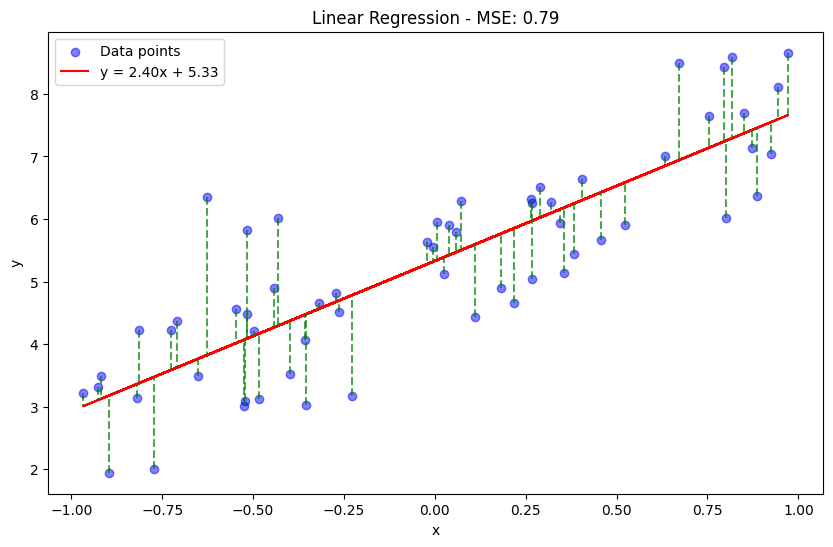

In [23]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model
lr_model1 = LinearRegression()

# Train the model using the fit method
# 'X' is the feature matrix, and 'y' is the target variable

# TODO <--- write your code here
lr_model1.fit(X,y)
# Retrieve the coefficient 'w1' for the feature from the trained model
# 'coef_' returns an array; we access the first element as it's a univariate regression
w1 = lr_model1.coef_[0][0]

# Retrieve the intercept 'b1' of the linear model
# 'intercept_' returns an array; we access the first element
b1 = lr_model1.intercept_[0]
# Plot the linear regression line
plot_univariate_line(w1, b1)

### From linear regression to non-linear regression

Do you think linear models can only handle linear data? Think again! In this notebook, we will see how to use linear regression to fit non-linear data. What is this sorcery? Well, it's not really magic, but rather a clever trick. 

Let's focus on the univariate case for the sake of discussion. Imagine our goal is to approximate a non-linear function 
$f(x):\mathbb{R} \to \mathbb{R}$. Assuming $f$ to be well-behaved (i.e., continuous), we can approximate it by its McLaurin series expansion:
\begin{align}
f(x) = \sum_{j=0}^{\infty} \frac{f^{(j)}(0)}{j!} x^j
\end{align}
where $f^{(k)}(0)$ is the $k$-th derivative of $f$ evaluated at $x=0$. Now, let's truncate the series at the $K$-th term:
\begin{align}
f(x) \approx \sum_{j=0}^{K} \frac{f^{(j)}(0)}{j!} x^j
\end{align}
Define $w_j = f^{(j)}(0)/j!$ then we can rewrite the above as
\begin{align}
f(x) \approx \sum_{j=0}^{K} w_j x^j = \mathbf{w}^\top \mathbf{x}_{\text{poly}}
\end{align}
where $\mathbf{w} = [w_0, w_1, \ldots, w_K]^\top$ and $\mathbf{x}_{\text{poly}} = [1, x, x^2, \ldots, x^K]^\top$. In words, you generate non-linear features by taking powers of the input variable $x$ and then fit a linear model to the data. This is called *polynomial regression*. Let's put this into practice.



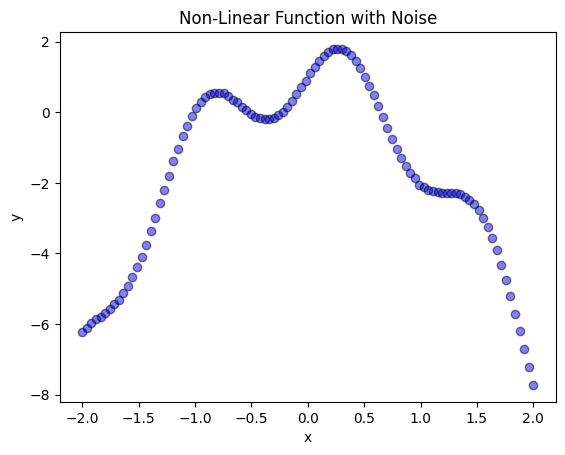

In [24]:
# Create an array of x values
X = np.linspace(-2, 2, 100).reshape(-1,1)

# Define a non-linear function
def non_linear_func(x):
    # f(x) = x^3 - 2x^2 + 5sin(x) + 2e^(-0.1x)
    f_x =  - 2 * x ** 2 + np.sin(5*x) + np.exp(-0.1*x)
    return f_x

# Create y values
y = non_linear_func(X)

# Add some noise to y
noise = np.random.normal(0, 0.01, y.shape)
y += noise

# Plot the data
plt.scatter(X, y, c='b', label='Data', alpha=0.5, edgecolors='black')
plt.title('Non-Linear Function with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #3.</span> Use polynomial regression to approximate a non-linear function

In this task, you will use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from sklearn to approximate the function 
\begin{align} 
f(x) = - 2x^2 + \sin(5x) + \exp(-0.1x), \quad -2 \leq x \leq 2\;. 
\end{align}

Your task is to check and see how the model performs with different degrees of polynomial features. Try degrees 2, 10, and your choice of degree. Plot the results and discuss your findings. 


</div>

Here is a simple example to help you get started with PolynomialFeatures.

```python
x = np.array([2, 3, 4])
poly_func = PolynomialFeatures(degree=3)
y = poly_func.fit_transform(x.reshape(-1, 1))
print(y)
```

This should create y = [[1,2,4,8], [1,3,9,27], [1,4,16,64]]. Note that the first column is always 1. This is because the first column is the bias term. So in essence, for $x=2$, you get $(1,x,x^2,x^3) = (1,2,4,8)$. For other values of $x$, you get the same thing. 

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 3
x_poly = PolynomialFeatures(degree=poly_degree).fit_transform(X)

# Use x_poly to fit a linear regression model
# TODO <--- write your code here
poly = PolynomialFeatures(poly_degree)
poly.fit(x_poly)

# Use predict method and plot the polynomial regression curve
# TODO <--- write your code here



PolynomialFeatures(degree=3)

# Predicting Airfoil Self-Noise 

Aircraft noise is a critical issue in terms of efficiency and environmental impact for the aerospace industry. NASA has set a goal to reduce the external noise generated by aircraft airframes. A significant contributor to total airframe noise is the airfoil self-noise, which results from the interaction between an airfoil blade and the turbulence produced in its boundary layer. While there have been many theoretical approaches to predict airfoil noise, such as those based on Lighthill's acousticics, our focus will be on a data-driven method.

We will use the [NASA Airfoil Self-Noise Dataset](https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset) to predict the sound pressure level of two and three-dimensional airfoil blade sections in an anechoic wind tunnel. This dataset encompasses 1503 experiments, each including the following variables:

1. **Frequency:** Measured in Hertz.
2. **Angle of Attack:** The angle between the oncoming air or relative wind and a reference line on the airfoil, measured in degrees.
3. **Chord Length:** The width of the airfoil, measured in meters.
4. **Free-Stream Velocity:** The speed of the wind in the tunnel, measured in meters per second (m/s).
5. **Suction Side Displacement Thickness:** The thickness of the boundary layer on the suction side of the airfoil, measured in meters.
6. **Scaled Sound Pressure Level (SSPL):** The noise level of the airfoil, measured in decibels (dB).

Our objective is to use the first five variables as predictors for the sixth variable, SSPL. Let's dive into the data-driven exploration to achieve this goal!

In [7]:
# We start by loading the data from a CSV file using Pandas
# 'data/AirfoilSelfNoise.csv' is the path to the dataset file
nasa_data = pd.read_csv("data/AirfoilSelfNoise.csv")
# Display examples of the features and target variable
nasa_data.head()





,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
from sklearn.model_selection import train_test_split

# Extracting features (X) and the target variable (y)
# We drop the 'SSPL' column to use it as the target variable and keep the rest as features
X = nasa_data.drop(columns=["SSPL"]).values  # Extracting feature values
y = nasa_data["SSPL"].values  # Extracting the target variable (Scaled Sound Pressure Level)

# Splitting the dataset into training and test sets
# 'test_size=100' means the test set will contain 100 samples
# 'X_train' and 'y_train' are the features and target variable for the training set
# 'X_test' and 'y_test' are the features and target variable for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=RND_SEED)

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #4.</span> Train a linear regression to predict Airfoil Self-Noise
Based on what we have done so far, 
- train a vanilla linear regression model on the NASA dataset. 
- Evaluate the model on the test set and report the mean squared error (MSE) of the model.

</div>

In [ ]:
# Initialize a Linear Regression model
nasa_model0 = LinearRegression()

# Train your model using X_train, y_train
# TODO <--- write your code here


# Evaluate your model on X_test, y_test
# TODO <--- write your code here

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">



### <span style="color: pink;">Task #5.</span> Improve the predictions using a polynomial regression model

Can you improve the quality of the predictions by using a polynomial regression model? If so, what should be the degree of the polynomial? Train a polynomial regression model on the NASA dataset and report the MSE of the model on the test set.


</div>

In [ ]:
# Set the degree of the polynomial features
poly_degree = # TODO <--- write your code here

# Create polynomial features
# TODO <--- write your code here


# Train your model using the polynomial version of X_train, y_train
# TODO <--- write your code here


# Evaluate your model using the polynomial version of X_test, y_test
# TODO <--- write your code here



<div style="background-color:#2b0080; padding: 10px; color: white; border-radius: 5px;">
<strong style="color: yellow;">Conclusions</strong>

And we are done for this week! Congratulations. In this notebook, we learned about linear regression and how to use it to predict the sound pressure level of airfoil blade sections. We also learned how to extend linear regression to handle non-linear data using polynomial regression. Next week, we will be looking at classification models. See you then!



</div>